In [6]:
from rbibm.plots.sweep_plots import plot_mulitobjective_paretto_front,plot_biobjective_singleparameter
from rbibm.utils.utils_data import get_sweep_dataset, query, query_main, query_rob_metric
from rbibm.plots.styles import use_style
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
name = "main_sweeps"
df = get_sweep_dataset(name)
df

,objective,sweeper,direction,search_space,overrides,best_params,best_value
0,"['rob_value', 'test_loss']",tpe_multi_objective,"['minimize', 'minimize']","['defense.params.beta=interval(0.0000001,20.)']","['defense=fisher_trace', 'task=sir', 'eval_rob...","[{'defense.params.beta': 12.91788229674371}, {...","[[0.000991368549875915, 3.6150431632995605], [..."
1,"['rob_value', 'test_loss']",tpe_multi_objective,"['minimize', 'minimize']","['defense.params.beta=interval(0.0000001,20.)']","['defense=fisher_trace', 'task=lotka_volterra'...","[{'defense.params.beta': 10.976270123665143}, ...","[[0.00036017788806930184, 2.515634298324585], ..."
2,"['rob_value', 'test_loss']",tpe_multi_objective,"['minimize', 'minimize']","['defense.params.beta=interval(0.0000001,20.)']","['defense=fisher_trace', 'task=vae_task', 'eva...","[{'defense.params.beta': 19.27325521365431}, {...","[[0.000651144131552428, 3.2256019115448], [0.0..."
3,"['rob_value', 'test_loss']",tpe_multi_objective,"['minimize', 'minimize']","['defense.params.beta=interval(0.0000001,20.)']","['defense=fisher_trace', 'task=spatial_sir', '...","[{'defense.params.beta': 8.751744281495128}, {...","[[0.00033004253054969013, 1.1331864595413208],..."
4,"['rob_value', 'test_loss']",tpe_multi_objective,"['minimize', 'minimize']","['defense.params.beta=interval(0.0000001,20.)']","['defense=fisher_trace', 'task=gaussian_linear...","[{'defense.params.beta': 10.976270123665143}, ...","[[0.01718483492732048, 13.201838493347168], [0..."
5,"['rob_value', 'test_loss']",tpe_multi_objective,"['minimize', 'minimize']","['defense.params.beta=interval(0.0000001,20.)']","['defense=fisher_trace', 'task=hudgkin_huxley'...","[{'defense.params.beta': 0.6608564782811595}, ...","[[3063.689453125, 3.3763034343719482], [1018.9..."


In [2]:
import torch

In [3]:
vmin = 0.0001
vmax = 20

In [4]:
figsize_col=2.05
figsize_row_expected_cov = 2.
figsize_row_rob = 1.8

Sweeper: tpe_multi_objective
Overrides: ['defense=fisher_trace', 'task=gaussian_linear', 'eval_rob.eps=2.0', 'model=maf_pyro', 'train.N_train=100000', 'train.N_test=10000', 'run_eval_approx=False']


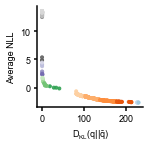

In [23]:
with use_style("pyloric"):
    fig,axes = plot_biobjective_singleparameter(name, 4, figsize=(figsize_col + 0.1,figsize_col), color_label="$\\beta$", cmap="tab20c", vmin=vmin,vmax=vmax, color_bar=False)
    axes.set_ylabel("Average NLL")
    axes.set_xlabel("$D_{KL}(q||\\tilde{q})$")
    #axes.set_title("VAE")
    #axes.set_xlim(-1,20)
    axes.set_xticks([0,100,200])
    plt.show()
    fig.savefig("gl_tradeoff.svg", transparent=True)

Sweeper: tpe_multi_objective
Overrides: ['defense=fisher_trace', 'task=vae_task', 'eval_rob.eps=2.0', 'model=maf_pyro', 'model/embedding_net=mlp', 'train.N_train=100000', 'train.N_test=10000', 'run_eval_approx=False']


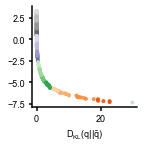

In [24]:
with use_style("pyloric"):
    fig,axes = plot_biobjective_singleparameter(name, 2, figsize=(figsize_col + 0.1,figsize_col), color_label="$\\beta$", cmap="tab20c", vmin=vmin,vmax=vmax, color_bar=False)
    axes.set_ylabel(None)
    axes.set_xlabel("$D_{KL}(q||\\tilde{q})$")
    #axes.set_title("VAE")
    #axes.set_xlim(-2,40)
    plt.show()
    fig.savefig("vae_tradeoff.svg", transparent=True)

Sweeper: tpe_multi_objective
Overrides: ['defense=fisher_trace', 'task=lotka_volterra', 'eval_rob.eps=2.0', 'model=maf_pyro', 'train.N_train=100000', 'train.N_test=10000', 'run_eval_approx=False']


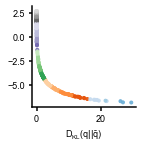

In [25]:
with use_style("pyloric"):
    fig,axes = plot_biobjective_singleparameter(name, 1, figsize=(figsize_col +0.1,figsize_col), color_label="$\\beta$", cmap="tab20c", vmin=vmin, vmax=vmax, color_bar=False)
    #axes.set_ylabel("$\\mathbb{E}_{p(\\theta,x)} [ -\\log q_\\phi(\\theta|x) ]$")
    axes.set_ylabel(None)
    axes.set_xlabel("$D_{KL}(q||\\tilde{q})$")
    #axes.set_title("Lotka volterra")
    #axes.set_xlim(0, 2)
    #axes.set_xticks([0.,1.,2.])
    plt.show()
    fig.savefig("lv_tradeoff.svg", transparent=True)

Sweeper: tpe_multi_objective
Overrides: ['defense=fisher_trace', 'task=sir', 'eval_rob.eps=2.0', 'model=maf_pyro', 'train.N_train=100000', 'train.N_test=10000', 'run_eval_approx=False']


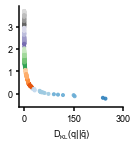

In [32]:
with use_style("pyloric"):
    fig,axes = plot_biobjective_singleparameter(name, 0, color_bar=False, figsize=(figsize_col,figsize_col), color_label="$\\beta$",vmin=vmin,vmax=vmax, cmap="tab20c")
    #axes.set_ylabel("$\\mathbb{E}_{p(\\theta,x)} [ -\\log q_\\phi(\\theta|x) ]$")
    axes.set_ylabel(None)
    axes.set_xlabel("$D_{KL}(q||\\tilde{q})$")
    #axes.set_title("SIR")
    axes.set_xlim(-15,300)
    axes.set_xticks([0.,150,300])
    plt.show()
    fig.savefig("sir_tradeoff.svg", transparent=True)

Sweeper: tpe_multi_objective
Overrides: ['defense=fisher_trace', 'task=spatial_sir', 'eval_rob.eps=2.0', 'model=maf_pyro', 'model/embedding_net=mlp', 'train.N_train=100000', 'train.N_test=10000', 'run_eval_approx=False']


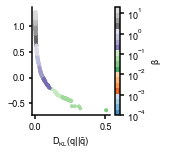

In [42]:
with use_style("pyloric"):
    fig,axes = plot_biobjective_singleparameter(name, 3, figsize=(figsize_col + 0.4,figsize_col + 0.1), color_label="$\\beta$",color_bar=True, vmin=vmin,vmax=vmax, cmap="tab20c")
    #axes.set_ylabel("$\\mathbb{E}_{p(\\theta,x)} [ -\\log q_\\phi(\\theta|x) ]$")
    cb = axes.collections[-1].colorbar
    cb.ax.set_yticks([1e-4, 1e-3 ,1e-2, 1e-1, 1., 1e1])
    axes.set_ylabel(None)
    axes.set_xlabel("$D_{KL}(q||\\tilde{q})$")
    #axes.set_title("Spatial sir")
    #axes.set_xlim(-0.035,1.)
    #axes.set_xticks([0,0.5,1.])
    plt.show()
    fig.savefig("spatial_sir_tradeoff.svg", transparent=True)

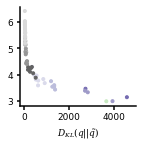

In [7]:
# Slightly relaxed paretto set

import numpy as np
df = query_main("hh_sweep", expand_params_defense=True)
df_rob =query_rob_metric("hh_sweep")
df_main = pd.merge(df,df_rob, on="id")
df_main = df_main[["params_defense_beta", "main_value_rob", "test_loss"]]
# df_main = df_main.drop_duplicates()
betas = df_main.params_defense_beta.to_numpy()
test_loss = df_main.test_loss.to_numpy()
rob = df_main.main_value_rob.to_numpy()
mask = (rob > 0.) & (rob < 5000)
betas = betas[mask]
test_loss = test_loss[mask]
rob = rob[mask]

from paretoset import paretoset
import pandas as pd

vals = pd.DataFrame({"test_loss": test_loss , 
                       "rob": rob })
mask = paretoset(vals, sense=["min", "min"], distinct=False)

relaxed_mask = np.array(mask, dtype=float)

for i in range(2000):
    vals = pd.DataFrame({"test_loss": test_loss + np.random.randn(len(test_loss))*0.4, 
                        "rob": rob + np.random.randn(len(rob))*10})
    mask2 = paretoset(vals, sense=["min", "min"], distinct=False)
    
    relaxed_mask =  relaxed_mask + np.array(mask2, dtype=float)

mask = relaxed_mask > 150

betas = betas[mask]
test_loss = test_loss[mask]
rob = rob[mask]
with use_style("pyloric"):
    fig = plt.figure(figsize=(figsize_col,figsize_col))
    plt.scatter(rob, test_loss, c=betas, norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap="tab20c")
    plt.xticks([0, 2000,4000])
    plt.xlim(-200,5000)
    plt.xlabel("$D_{KL}(q||\\tilde{q})$")
    fig.tight_layout()
    fig.savefig("hh_tradeoff.svg")